In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:

import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization

In [3]:
## Load the dataset
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
##Let's plot some images to see what they are

def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

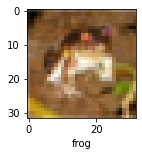

In [11]:
plot_sample(x_train, y_train, 0)


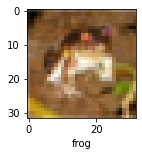

In [12]:
plot_sample(x_train, y_train, 0)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Build simple artificial neural network for image classification

In [14]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN = ann.fit(x_train, y_train,validation_data=(x_test, y_test) , epochs=5)

2022-02-26 10:57:07.375349: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-02-26 10:57:08.009777: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8126 - accuracy: 0.3534 - val_loss: 1.7124 - val_accuracy: 0.3849
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6224 - accuracy: 0.4297 - val_loss: 1.5931 - val_accuracy: 0.4298
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5403 - accuracy: 0.4591 - val_loss: 1.5538 - val_accuracy: 0.4497
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4813 - accuracy: 0.4768 - val_loss: 1.5067 - val_accuracy: 0.4649
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4319 - accuracy: 0.4971 - val_loss: 1.5075 - val_accuracy: 0.4555


You can see that at the end of 5 epochs, accuracy is at around 49%

In [15]:


from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.39      0.48      1000
           1       0.65      0.55      0.60      1000
           2       0.23      0.70      0.35      1000
           3       0.44      0.17      0.25      1000
           4       0.53      0.22      0.31      1000
           5       0.43      0.34      0.38      1000
           6       0.46      0.59      0.52      1000
           7       0.71      0.35      0.47      1000
           8       0.64      0.60      0.62      1000
           9       0.53      0.63      0.57      1000

    accuracy                           0.46     10000
   macro avg       0.53      0.46      0.46     10000
weighted avg       0.53      0.46      0.46     10000



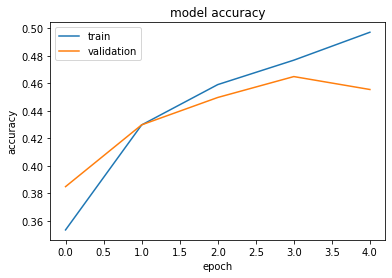

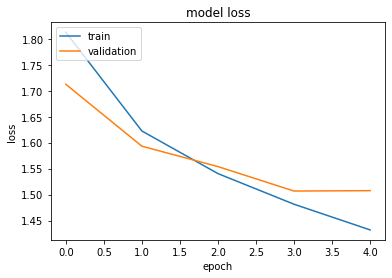

In [16]:
#  "Accuracy"
plt.plot(ANN.history['accuracy'])
plt.plot(ANN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(ANN.history['loss'])
plt.plot(ANN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Now let us build a convolutional neural network to train our images

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

compile the model

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
CNN = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, verbose=2)

2022-02-26 10:57:36.871013: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-02-26 10:57:37.478821: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 - 11s - loss: 1.7418 - accuracy: 0.3527 - val_loss: 1.3931 - val_accuracy: 0.4911 - 11s/epoch - 7ms/step
Epoch 2/100
1563/1563 - 8s - loss: 1.3079 - accuracy: 0.5284 - val_loss: 1.1143 - val_accuracy: 0.6043 - 8s/epoch - 5ms/step
Epoch 3/100
1563/1563 - 8s - loss: 1.1332 - accuracy: 0.5986 - val_loss: 0.9723 - val_accuracy: 0.6569 - 8s/epoch - 5ms/step
Epoch 4/100
1563/1563 - 8s - loss: 1.0367 - accuracy: 0.6358 - val_loss: 0.8456 - val_accuracy: 0.6992 - 8s/epoch - 5ms/step
Epoch 5/100
1563/1563 - 8s - loss: 0.9660 - accuracy: 0.6649 - val_loss: 0.8195 - val_accuracy: 0.7132 - 8s/epoch - 5ms/step
Epoch 6/100
1563/1563 - 8s - loss: 0.9235 - accuracy: 0.6789 - val_loss: 0.8179 - val_accuracy: 0.7154 - 8s/epoch - 5ms/step
Epoch 7/100
1563/1563 - 8s - loss: 0.8788 - accuracy: 0.6941 - val_loss: 0.7568 - val_accuracy: 0.7364 - 8s/epoch - 5ms/step
Epoch 8/100
1563/1563 - 8s - loss: 0.8458 - accuracy: 0.7069 - val_loss: 0.7577 - val_accuracy: 0.7350 - 8s/epoch - 5ms/ste

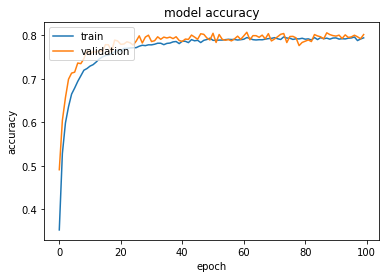

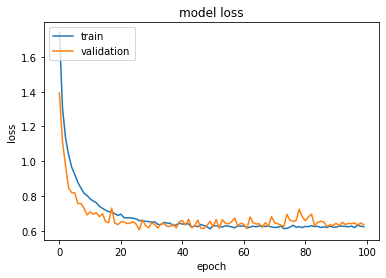

In [20]:
#  "Accuracy"
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### With CNN, at the end 7 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

we can add   batch normalization in an effort to stabilize the learning and perhaps accelerate the learning process. To offset this acceleration, we can increase the regularization by changing the dropout from a fixed pattern to an increasing pattern.

In [21]:

model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax')) 
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)      

In [22]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
CNN1 = model2.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, verbose=2)

2022-02-26 11:11:26.733639: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 - 9s - loss: 1.7748 - accuracy: 0.3992 - val_loss: 1.4243 - val_accuracy: 0.5024 - 9s/epoch - 6ms/step
Epoch 2/100
1563/1563 - 8s - loss: 1.3051 - accuracy: 0.5353 - val_loss: 1.2019 - val_accuracy: 0.5782 - 8s/epoch - 5ms/step
Epoch 3/100
1563/1563 - 8s - loss: 1.1687 - accuracy: 0.5843 - val_loss: 1.0876 - val_accuracy: 0.6153 - 8s/epoch - 5ms/step
Epoch 4/100
1563/1563 - 8s - loss: 1.0798 - accuracy: 0.6228 - val_loss: 0.9442 - val_accuracy: 0.6674 - 8s/epoch - 5ms/step
Epoch 5/100
1563/1563 - 8s - loss: 1.0108 - accuracy: 0.6469 - val_loss: 0.9487 - val_accuracy: 0.6613 - 8s/epoch - 5ms/step
Epoch 6/100
1563/1563 - 8s - loss: 0.9582 - accuracy: 0.6652 - val_loss: 0.8162 - val_accuracy: 0.7118 - 8s/epoch - 5ms/step
Epoch 7/100
1563/1563 - 8s - loss: 0.9058 - accuracy: 0.6845 - val_loss: 0.8142 - val_accuracy: 0.7185 - 8s/epoch - 5ms/step
Epoch 8/100
1563/1563 - 8s - loss: 0.8791 - accuracy: 0.6943 - val_loss: 0.7530 - val_accuracy: 0.7368 - 8s/epoch - 5ms/step


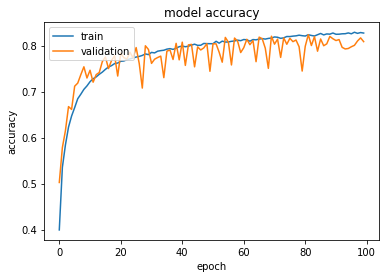

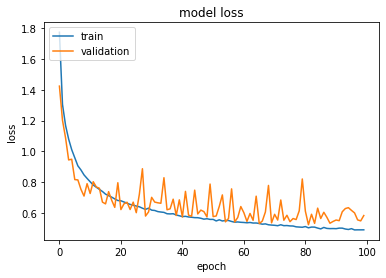

In [24]:
#  "Accuracy"
plt.plot(CNN1.history['accuracy'])
plt.plot(CNN1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(CNN1.history['loss'])
plt.plot(CNN1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
model3 = Sequential()
model3.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3))) 
model3.add(BatchNormalization())
model3.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3))) 
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax')) 
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [28]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
CNN2 = model3.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, verbose=2)

Epoch 1/100
1563/1563 - 14s - loss: 1.7553 - accuracy: 0.4036 - val_loss: 1.2069 - val_accuracy: 0.5687 - 14s/epoch - 9ms/step
Epoch 2/100
1563/1563 - 11s - loss: 1.1716 - accuracy: 0.5847 - val_loss: 0.9096 - val_accuracy: 0.6780 - 11s/epoch - 7ms/step
Epoch 3/100
1563/1563 - 10s - loss: 0.9728 - accuracy: 0.6610 - val_loss: 0.8967 - val_accuracy: 0.6954 - 10s/epoch - 7ms/step
Epoch 4/100
1563/1563 - 10s - loss: 0.8575 - accuracy: 0.7034 - val_loss: 0.8437 - val_accuracy: 0.7056 - 10s/epoch - 7ms/step
Epoch 5/100
1563/1563 - 10s - loss: 0.7790 - accuracy: 0.7370 - val_loss: 0.6929 - val_accuracy: 0.7569 - 10s/epoch - 7ms/step
Epoch 6/100
1563/1563 - 10s - loss: 0.7199 - accuracy: 0.7534 - val_loss: 0.6526 - val_accuracy: 0.7738 - 10s/epoch - 7ms/step
Epoch 7/100
1563/1563 - 10s - loss: 0.6744 - accuracy: 0.7692 - val_loss: 0.6093 - val_accuracy: 0.7900 - 10s/epoch - 7ms/step
Epoch 8/100
1563/1563 - 10s - loss: 0.6323 - accuracy: 0.7839 - val_loss: 0.6345 - val_accuracy: 0.7823 - 10s/e

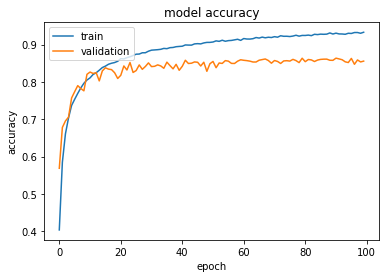

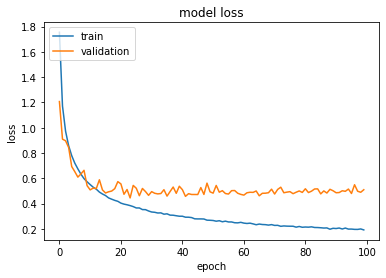

In [30]:
#  "Accuracy"
plt.plot(CNN2.history['accuracy'])
plt.plot(CNN2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(CNN2.history['loss'])
plt.plot(CNN2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
y_preds_final = model3.predict(x_test)


In [43]:
y_preds_final[:5]

array([[4.2262814e-06, 1.8693448e-11, 1.1850775e-05, 9.9985540e-01,
        1.8903426e-06, 5.8833924e-05, 6.6565357e-05, 7.9341044e-07,
        4.5751784e-07, 5.2527864e-11],
       [9.8047553e-07, 9.0554074e-08, 1.7671496e-10, 2.2940899e-08,
        1.9515520e-09, 1.1168331e-08, 1.3755183e-09, 5.0792139e-09,
        9.9999893e-01, 3.4114997e-09],
       [1.3293185e-04, 6.4540253e-04, 8.5722995e-06, 3.6435310e-07,
        1.4318758e-06, 1.9726388e-06, 3.1402553e-05, 2.0696452e-06,
        9.9917018e-01, 5.6642634e-06],
       [9.9532408e-01, 2.2065142e-05, 2.6098624e-04, 1.7173932e-05,
        5.3459353e-06, 6.1635143e-07, 1.4522911e-06, 1.7219521e-07,
        4.1031283e-03, 2.6505673e-04],
       [1.3131552e-06, 1.0184359e-06, 1.3984158e-04, 3.5856930e-05,
        5.8238518e-05, 8.7837044e-09, 9.9975938e-01, 1.2755580e-10,
        2.3101957e-06, 1.9991990e-06]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_preds_final]
y_classes[:5]

[3, 8, 8, 0, 6]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

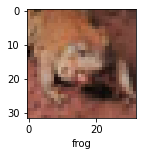

In [47]:
plot_sample(x_test, y_test,5)

In [48]:
classes[y_classes[5]]

'frog'

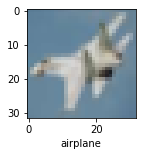

In [49]:
plot_sample(x_test, y_test,10)

In [50]:
classes[y_classes[10]]

'airplane'